## Вариант №3

## Задача №1.
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
Дополнительное задание: для произвольной колонки данных построить гистограмму.

Датасет https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine - набор данных о вине.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import math
import matplotlib.pyplot as plt 
import sklearn

warnings.simplefilter('ignore')

In [17]:
# Импортируем датасет из sklearn.
from sklearn.datasets import load_wine
wine=load_wine()

# Преобразуем в датасет для pandas.
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

# Проверяем данные после преобразования.
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [7]:
# Ищем пропуски.
(data.isnull() | data.empty | data.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [8]:
# Основные статистические характеристки набора данных.
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [14]:
# Посмотрим на распределение целевой переменной.
# Конвертируем переменную в категорию.
data.target=data.target.astype('int64').astype('category')

# Частота повторения.
freq=data['target'].value_counts()

freq

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:>

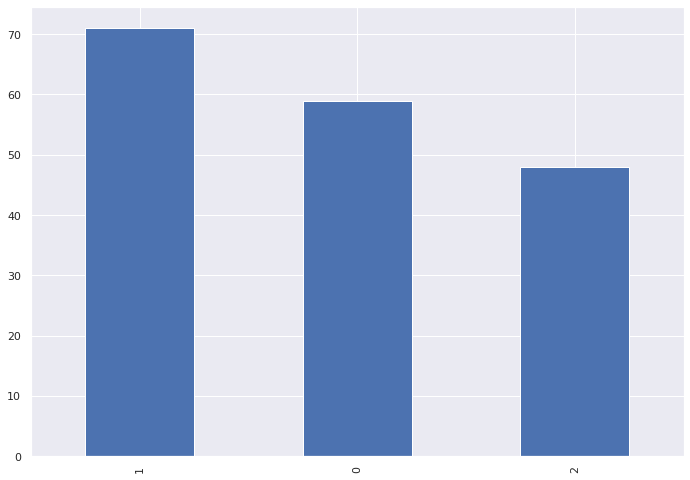

In [15]:
# Отобразим гистрограмму.
freq.plot(kind='bar')

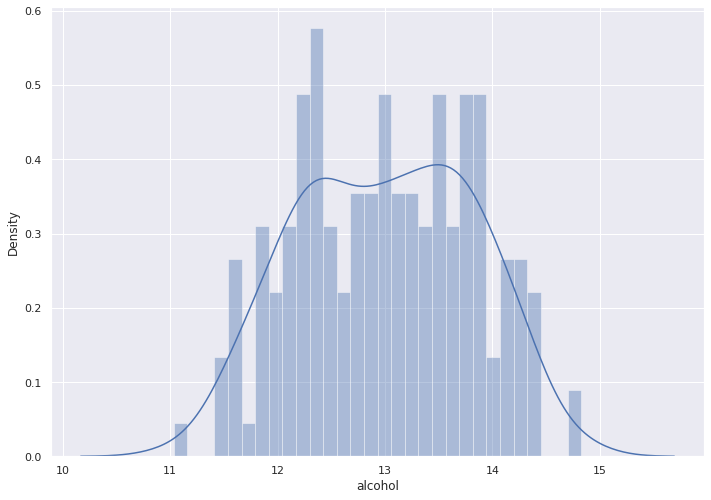

In [16]:
# Распределение переменной alcohol.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data["alcohol"], bins=30)
plt.show()

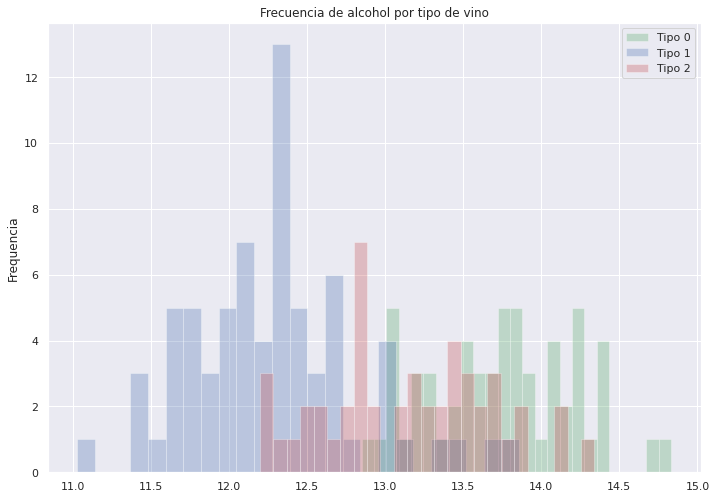

In [13]:
# Распределение переменной alcohol для каждой из целевых категорий.
x1 = data.loc[data.target==0, 'alcohol']
x2 = data.loc[data.target==1, 'alcohol']
x3 = data.loc[data.target==2, 'alcohol']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de alcohol por tipo de vino', ylabel='Frequencia')

plt.legend();

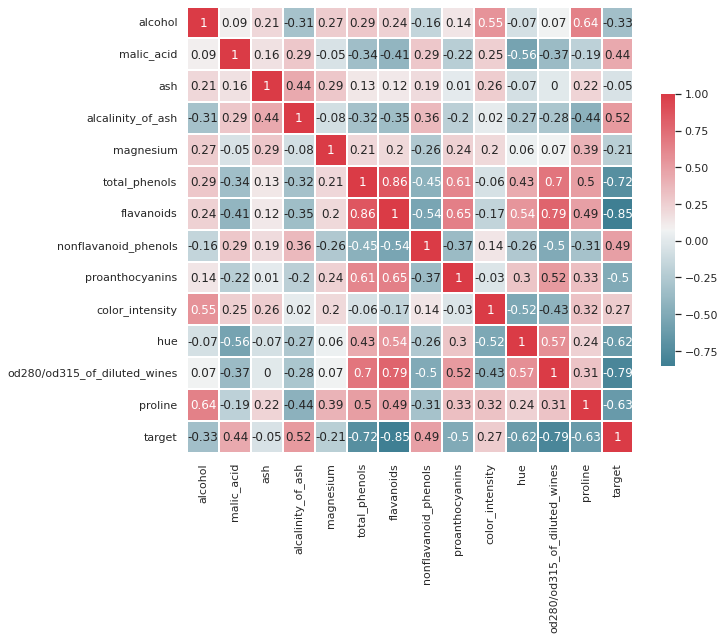

In [18]:
# Создаем матрицу корреляции, которая измеряет линейные отношения между переменными.
corr = data.corr().round(2)
f, ax = plt.subplots(figsize=(10, 10)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(data=corr, cmap=cmap, annot=True, vmax=1.0, square=True, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)#, vmax=1.0, square=True, xticklabels=2, yticklabels=2, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax) 
plt.show()

## Выводы:

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда оно близко к -1, переменные имеют сильную отрицательную корреляцию.

Глядя на матрицу корреляции, мы видим, что целевая переменная target имеет высокую отрицательную корреляцию с total_phenols(-0.72) и od280/od315_of_diluted_wines(-0.79) и flavanoids(-0.85).

Особенности flavanoids, od280/od315_of_diluted_wines иметют соотношение (0,79). Эти пары признаков сильно связаны друг с другом. Мы не должны выбирать обе эти функции вместе для обучения модели. То же самое касается функций flavanoids а также total_phenols, которые имеют корреляцию (0.86) и total_phenols, od280/od315_of_diluted_wines с корреляцией (0.7). Как итог все три признака сильно связаны друг с другом, это значит, что мы не должны выбирать любые два параметра из этих вместе для обучения модели.